# Customer Churn Prediction Project

## Overview
This Jupyter notebook serves as a documentation for a customer churn prediction project. The main objective is to analyze customer data and build a predictive model to identify customers who are likely to churn in the future. By understanding and predicting churn, businesses can take proactive measures to retain customers and optimize their strategies.

## Dataset
The project uses a dataset containing relevant information about customers, including features such as customer demographics, usage patterns, and historical interactions. The dataset is crucial for training and evaluating the predictive model.

## Goal
The primary goal of this project is to develop a machine learning model capable of accurately predicting customer churn. This involves data preprocessing, exploratory data analysis (EDA), feature engineering, model training, and evaluation.

## Methodology

1. Data preprocessing : EDA, one hot encoding, missing value treatment
2. Use split-learn to make test-train split
3. Use Classification Algorithms XGBoost and Random Forests on the dataset
4. Use GridSearchCV to tune the hyper parameters
5. Use SMOTE to balance the dataset.
6. Re train the new dataset and compare results


### 0. Load the necessary libraries and Dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1. Data preprocessing : EDA, one hot encoding, missing value treatment

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### as we can see that there is something strange with the output of the 'df.describe()' call. The "TotalCharges" column is not shown in the output. So, the dtype of "TotalCharges" is not numeric. let's cross check once.

In [5]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [6]:
df = df[df["TotalCharges"]!=" "]
df["TotalCharges"]= df["TotalCharges"].astype("float64")

<ipython-input-6-8ad21148fb55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"]= df["TotalCharges"].astype("float64")


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Now let X be the input dataset and y be the output dataset. Lets define both of them

In [8]:
X = df.drop(["customerID","Churn"],axis=1)
y = df["Churn"]

In [9]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


#### Now lets do one hot encoding for the input X

In [10]:
X = pd.get_dummies(X)
X.head()



,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [11]:
y = y.map({'No': 0, 'Yes': 1})

### 2. Use split-learn to make test-train split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 3. Use Classification Algorithms XGBoost and Random Forests on the dataset

#### 3.1 RandomForest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=100)

rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [14]:
rf_predict = rf_model.predict(X_test)

accuracy_score(rf_predict,y_test)

0.7815699658703071

In [15]:
print(classification_report(rf_predict,y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1398
           1       0.47      0.60      0.53       360

    accuracy                           0.78      1758
   macro avg       0.68      0.72      0.69      1758
weighted avg       0.80      0.78      0.79      1758



#### as we can see that with RandomForest algorithm we get the accuracy score to about 78.15%

#### 3.2 XGBoost

In [16]:
from xgboost import XGBClassifier

XGBmodel = XGBClassifier(random_state=100)

XGBmodel.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [17]:
XGBpredict = XGBmodel.predict(X_test)

accuracy_score(XGBpredict,y_test)

0.7753128555176336

In [18]:
print(classification_report(XGBpredict,y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1353
           1       0.51      0.58      0.54       405

    accuracy                           0.78      1758
   macro avg       0.69      0.71      0.70      1758
weighted avg       0.79      0.78      0.78      1758



### we got an accuracy of 77.53% on test data from XGBoost. The low accuracies may be due to overfitting. Lets check how the model predicts the train data

In [19]:
print(accuracy_score(rf_model.predict(X_train),y_train))
print(accuracy_score(XGBmodel.predict(X_train),y_train))

0.9982935153583617
0.9544937428896473


### as we can see that it seems like that both models have overfitted the data. Lets use GridSearchCV now to hypertune the paramaters.

### 4 .Use GridSearchCV to tune the hyper parameters

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {

    'max_depth': [2,4,8,12,16],
    'min_samples_split': [2,4,8,20,40,80,100,200],
    'min_samples_leaf': [1, 2, 4]
}

rf_model_tuned = RandomForestClassifier(random_state=100)
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': [2, 4, 8, 12, 16],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8, 20, 40, 80, 100, 200]},
             scoring='accuracy')

In [21]:
best_params_rf = grid_search.best_params_
best_params_rf

{'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 100}

In [47]:
rf_model_best = grid_search.best_estimator_

test_accuracy = rf_model_best.score(X_test, y_test)
test_accuracy

0.8395335608646189


#### as we can see our accuracy increased a little. Now lets try the same with XGBoost

In [25]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
}

XGBmodel_tuned = XGBClassifier(random_state = 100)

grid_search = GridSearchCV(XGBmodel_tuned, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=100, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [26]:
best_params_XGB = grid_search.best_params_
best_params_XGB

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 0.8}

In [48]:
XGB_model_best = grid_search.best_estimator_

test_accuracy = XGB_model_best.score(X_test, y_test)
test_accuracy

0.8463594994311718


#### So definetly GridSearchCv did improve the results on test data by about 5%. But still it is not much improvement. The low accuracy is  due imbalance in dataset. So we will use SMOTE (Synthetic Minority Oversampling Technique) which makes use of the K-nearest neighbour algorithm to generate synthetic and new data for the minority column which here is 1 here as we can see below (meaning churn = yes)

### 5. Creating Syntheic data using SMOTE method

<Axes: xlabel='Churn', ylabel='count'>

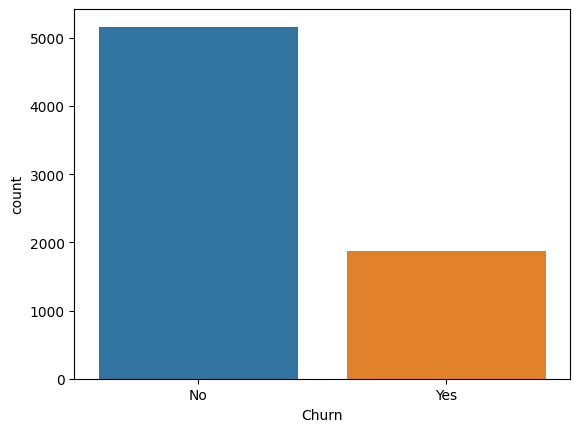

In [28]:
import seaborn as sns
sns.countplot(x = df["Churn"])

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [34]:
y_resampled.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

### 6. Re train the new dataset and compare results

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [41]:
rf_model = RandomForestClassifier(random_state=100)

rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [49]:
rf_predict = rf_model.predict(X_test)

accuracy_score(rf_predict,y_test)

0.925925639039504


In [44]:
XGBmodel = XGBClassifier(random_state=100)

XGBmodel.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [50]:
XGBpredict = XGBmodel.predict(X_test)

accuracy_score(XGBpredict,y_test)

0.9243764523625096


So using the SMOTE technique to oversample the minority class the accuracy jumped from 81% to 92%